## ECG Heartbeat Categorization

> This dataset is composed of two collections of heartbeat signals derived from two famous datasets in heartbeat classification, the MIT-BIH Arrhythmia Dataset and The PTB Diagnostic ECG Database.

In [130]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os


In [131]:
data = pd.read_csv("../input/heartbeat/mitbih_train.csv", header=None)
df = pd.DataFrame(data)

In [132]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [134]:
#df.value_counts()

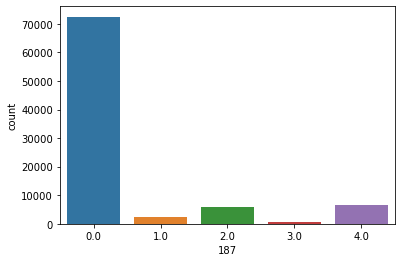

In [135]:
classes = []
sns.countplot(x=187, data = df) 

In [136]:
class_1 = df[df[187]==1.0]
class_2 = df[df[187]==2.0]
class_3 = df[df[187]==3.0]
class_4 = df[df[187]==4.0]
class_0 = df[df[187]==0.0].sample(n = 8000)

In [137]:
new_df = pd.concat([class_0, class_1, class_2, class_3, class_4])

In [138]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
49264,0.287879,0.421212,0.612121,0.224242,0.000000,0.030303,0.148485,0.130303,0.154545,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54113,0.933518,0.454294,0.130194,0.072022,0.113573,0.080332,0.094183,0.069252,0.085873,0.063712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50136,0.916828,1.000000,0.557060,0.150870,0.075435,0.032882,0.017408,0.034816,0.077369,0.208897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67747,1.000000,0.826558,0.666667,0.474255,0.371274,0.216802,0.143631,0.102981,0.073171,0.048780,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25738,0.971311,0.868852,0.405738,0.147541,0.110656,0.139344,0.081967,0.069672,0.036885,0.028689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87553,0.901506,0.845886,0.800695,0.748552,0.687138,0.599073,0.512167,0.427578,0.395133,0.402086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


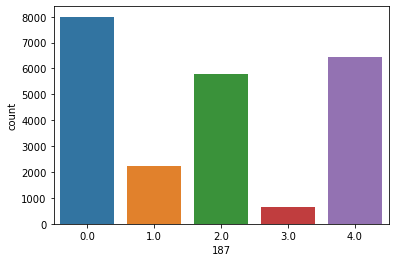

In [140]:
sns.countplot(x=187, data = new_df) 

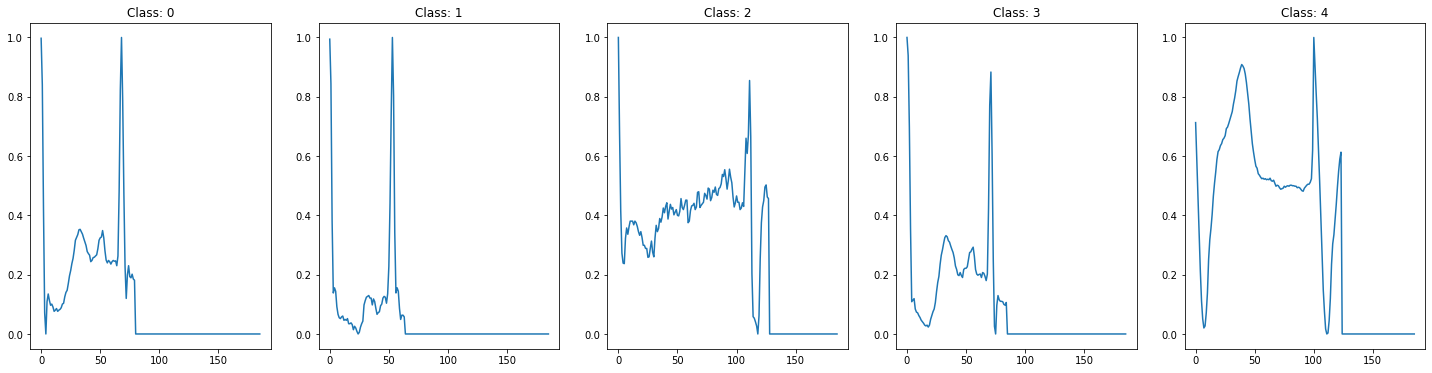

In [141]:
index = 0

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(25,6))

for i in range(5):
  ax[i].plot(new_df[new_df[187]==float(i)].sample(1).iloc[0,:186])
  ax[i].set_title('Class: '+str(i))


In [142]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df.drop([187], axis=1), new_df[187], test_size = 0.1)

In [143]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [144]:
from keras.utils.np_utils import to_categorical

y_train=keras.utils.np_utils.to_categorical(y_train)
y_test=keras.utils.np_utils.to_categorical(y_test)

In [145]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout , Conv2D

In [146]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
model.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    

model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 1024, activation='relu'))

model.add(Dense(units = 5, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_33 (Conv1D)           (None, 187, 32)           128       
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 187, 64)           6208      
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 187, 128)          41088     
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 94, 128)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 94, 128)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 12032)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)              

In [147]:
callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [148]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50 , callbacks=callbacks, batch_size=32)
model.load_weights('best_model.h5')

Epoch 1/50
650/650 [==============================] - 3s 5ms/step - loss: 0.3853 - accuracy: 0.8614 - val_loss: 0.2502 - val_accuracy: 0.9155
Epoch 2/50
650/650 [==============================] - 3s 4ms/step - loss: 0.2071 - accuracy: 0.9303 - val_loss: 0.1821 - val_accuracy: 0.9420
Epoch 3/50
650/650 [==============================] - 3s 4ms/step - loss: 0.1596 - accuracy: 0.9465 - val_loss: 0.1614 - val_accuracy: 0.9515
Epoch 4/50
650/650 [==============================] - 4s 5ms/step - loss: 0.1263 - accuracy: 0.9556 - val_loss: 0.1306 - val_accuracy: 0.9615
Epoch 5/50
650/650 [==============================] - 3s 4ms/step - loss: 0.1073 - accuracy: 0.9628 - val_loss: 0.1431 - val_accuracy: 0.9558
Epoch 6/50
650/650 [==============================] - 3s 4ms/step - loss: 0.0868 - accuracy: 0.9683 - val_loss: 0.1421 - val_accuracy: 0.9606
Epoch 7/50
650/650 [==============================] - 3s 4ms/step - loss: 0.0758 - accuracy: 0.9731 - val_loss: 0.1242 - val_accuracy: 0.9684
Epoch 

In [149]:
# Prediction

y_pred = model.predict(X_test)

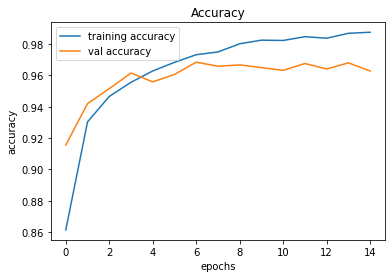

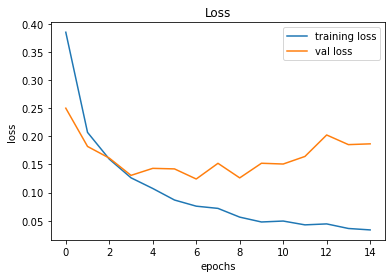

In [150]:
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [151]:
loss,accuracy=model.evaluate(X_test,y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)


73/73 [==============================] - 0s 2ms/step - loss: 0.1242 - accuracy: 0.9684
Test loss: 0.12417426705360413
Test accuracy: 0.9683845639228821


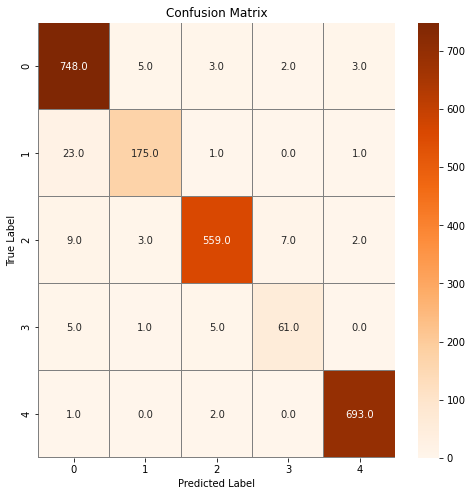

In [152]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Oranges",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [153]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       761
           1       0.95      0.88      0.91       200
           2       0.98      0.96      0.97       580
           3       0.87      0.85      0.86        72
           4       0.99      1.00      0.99       696

    accuracy                           0.97      2309
   macro avg       0.95      0.93      0.94      2309
weighted avg       0.97      0.97      0.97      2309



In [154]:
train_df=pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',header=None)
test_df=pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',header=None)

In [155]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

train_df, val_df = train_test_split(train_df, test_size = 0.20)

In [156]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    57934
4     5170
2     4634
1     1789
3      516
Name: 187, dtype: int64


In [157]:
df=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
3545,1.0,0.848227,0.463830,0.134752,0.008511,0.096454,0.171631,0.154610,0.131915,0.144681,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
36465,1.0,0.989529,0.235602,0.000000,0.115183,0.141361,0.136126,0.251309,0.272251,0.219895,...,0.361257,0.329843,0.340314,0.366492,0.371728,0.382199,0.387435,0.34555,0.371728,1
57536,0.0,0.062069,0.142069,0.242759,0.386207,0.520000,0.600000,0.638621,0.652414,0.718621,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2
77413,1.0,0.922876,0.677124,0.329412,0.081046,0.094118,0.094118,0.058824,0.047059,0.040523,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3
61977,1.0,0.776190,0.645238,0.530952,0.435714,0.426190,0.492857,0.471429,0.419048,0.269048,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4


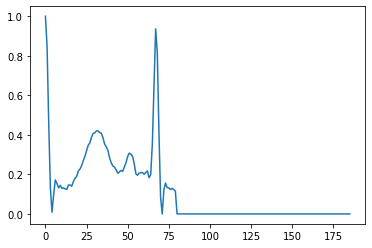

In [158]:
 plt.plot(df.iloc[0,:186])

In [159]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    57934
4     5170
2     4634
1     1789
3      516
Name: 187, dtype: int64


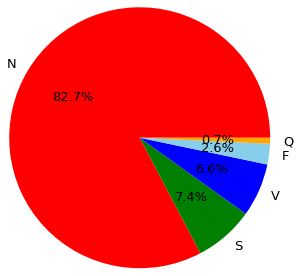

In [160]:
plt.pie(equilibre, labels=['N','S','V','F','Q'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%',radius=1.5,textprops={'fontsize': 13})
plt.show()

In [161]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=48483,random_state=42,replace=True)

df_1_upsample=resample(df_1,replace=True,n_samples=30000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=30000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=30000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=30000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [162]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    48483
4    30000
3    30000
2    30000
1    30000
Name: 187, dtype: int64


In [163]:
df=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
23982,0.800347,0.690972,0.470486,0.248264,0.071181,0.015625,0.031250,0.050347,0.062500,0.062500,...,0.095486,0.086806,0.095486,0.083333,0.078125,0.0,0.0,0.0,0.0,0
44845,1.000000,0.665049,0.033981,0.024272,0.116505,0.082524,0.033981,0.126214,0.121359,0.067961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1
23688,0.819957,0.943601,0.893709,0.852495,0.811280,0.811280,0.789588,0.752711,0.553145,0.290672,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2
31279,1.000000,0.856742,0.632023,0.331461,0.091292,0.091292,0.098315,0.066011,0.057584,0.040730,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3
45931,0.964931,0.929862,0.878852,0.818278,0.707758,0.554729,0.441020,0.350691,0.259299,0.180659,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4


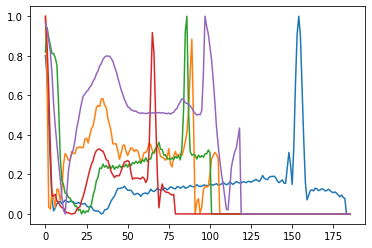

In [164]:
plt.plot(df.iloc[0,:186] )
plt.plot(df.iloc[1,:186] )
plt.plot(df.iloc[2,:186] )
plt.plot(df.iloc[3,:186] )
plt.plot(df.iloc[4,:186] )

In [165]:
train_target=train_df[187]
Y_train=to_categorical(train_target)

val_target=val_df[187]
Y_val=to_categorical(val_target)


X_train=train_df.iloc[:,:186].values
X_val=val_df.iloc[:,:186].values

X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_val = X_val.reshape(len(X_val), X_val.shape[1],1)

In [166]:
test_target=test_df[187]
Y_test=to_categorical(test_target)
X_test=test_df.iloc[:,:186].values
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [167]:
import keras

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Model, Sequential
from keras.layers import Input,Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint


def get_model():
        im_shape=(X_train.shape[1],1)
        inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
        

        
        x0 = keras.layers.Conv1D(128,8, activation='relu',input_shape=im_shape)(inputs_cnn)  
        x0= keras.layers.BatchNormalization()(x0)
        pool0=MaxPool1D(pool_size=(4), strides=(2), padding="same")(x0)

        

        x1 = keras.layers.Conv1D(128,8, activation='relu',input_shape=im_shape)(pool0) 
        x1= keras.layers.BatchNormalization()(x1)
        pool1=MaxPool1D(pool_size=(4), strides=(2), padding="same")(x1)

        
        x2 = keras.layers.Conv1D(128,6, activation='relu',input_shape=im_shape)(pool1) 
        x2 = keras.layers.BatchNormalization()(x2)
        pool2=MaxPool1D(pool_size=(3), strides=(2), padding="same")(x2)

        
        x3 = keras.layers.Conv1D(128,6, activation='relu',input_shape=im_shape)(pool2) 
        x3 = keras.layers.BatchNormalization()(x3)
        pool3=MaxPool1D(pool_size=(3), strides=(2), padding="same")(x3)

        
        x4 = keras.layers.Conv1D(128,4, activation='relu',input_shape=im_shape)(pool3) 
        x4 = keras.layers.BatchNormalization()(x4)
        pool4=MaxPool1D(pool_size=(3), strides=(1), padding="same")(x4)

        
        x5 = keras.layers.Conv1D(128,2, activation='relu',input_shape=im_shape)(pool4) 
        x5 = keras.layers.BatchNormalization()(x5)
        pool5=MaxPool1D(pool_size=(3), strides=(1), padding="same")(x5)

        
        x6 = keras.layers.Conv1D(128,2, activation='relu',input_shape=im_shape)(pool5) 
        x6 = keras.layers.BatchNormalization()(x6)
        pool6=MaxPool1D(pool_size=(2), strides=(1), padding="same")(x6)

        
        x7 = keras.layers.Conv1D(128,2, activation='relu',input_shape=im_shape)(pool6) 
        x7 = keras.layers.BatchNormalization()(x7)
        pool7=MaxPool1D(pool_size=(2), strides=(1), padding="same")(x7)
    
    
        x = Flatten()(pool7)
        x = keras.layers.BatchNormalization()(x)
        
        dense_1 = Dense(32, activation='relu')(x)
        dense_2 = Dense(32, activation='relu')(dense_1)

        out = keras.layers.Dense(5, activation='softmax')(dense_2)
        return keras.Model(inputs=inputs_cnn, outputs=out)


    

In [168]:
model = get_model()



model.compile(optimizer = 'adam' ,loss= "categorical_crossentropy", metrics=["accuracy"])

model.summary()


Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs_cnn (InputLayer)      [(None, 186, 1)]          0         
_________________________________________________________________
conv1d_36 (Conv1D)           (None, 179, 128)          1152      
_________________________________________________________________
batch_normalization_27 (Batc (None, 179, 128)          512       
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 90, 128)           0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 83, 128)           131200    
_________________________________________________________________
batch_normalization_28 (Batc (None, 83, 128)           512       
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 42, 128)          

In [169]:
callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [170]:
history=model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50 , callbacks=callbacks, batch_size=526)
model.load_weights('best_model.h5')

Epoch 1/50
321/321 [==============================] - 11s 33ms/step - loss: 0.2608 - accuracy: 0.9070 - val_loss: 3.6652 - val_accuracy: 0.0251
Epoch 2/50
321/321 [==============================] - 10s 32ms/step - loss: 0.1039 - accuracy: 0.9635 - val_loss: 1.1201 - val_accuracy: 0.6328
Epoch 3/50
321/321 [==============================] - 10s 33ms/step - loss: 0.0624 - accuracy: 0.9788 - val_loss: 0.1802 - val_accuracy: 0.9464
Epoch 4/50
321/321 [==============================] - 10s 32ms/step - loss: 0.0451 - accuracy: 0.9850 - val_loss: 0.0895 - val_accuracy: 0.9751
Epoch 5/50
321/321 [==============================] - 10s 32ms/step - loss: 0.0334 - accuracy: 0.9890 - val_loss: 0.1092 - val_accuracy: 0.9701
Epoch 6/50
321/321 [==============================] - 10s 32ms/step - loss: 0.0294 - accuracy: 0.9903 - val_loss: 0.1316 - val_accuracy: 0.9635
Epoch 7/50
321/321 [==============================] - 10s 32ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.1325 - val_accuracy:

In [172]:
loss,accuracy=model.evaluate(X_val,Y_val)

print('Test loss:', loss)
print('Test accuracy:', accuracy)


548/548 [==============================] - 2s 4ms/step - loss: 0.0749 - accuracy: 0.9857
Test loss: 0.07491900771856308
Test accuracy: 0.9857232570648193


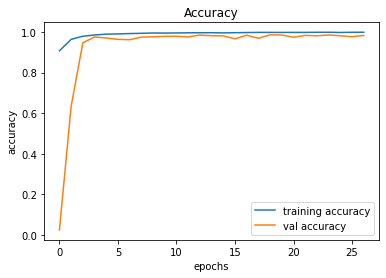

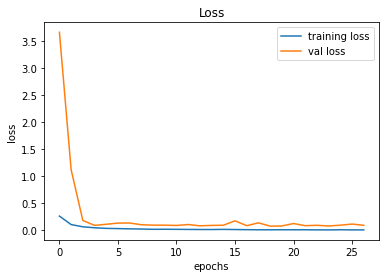

In [173]:
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

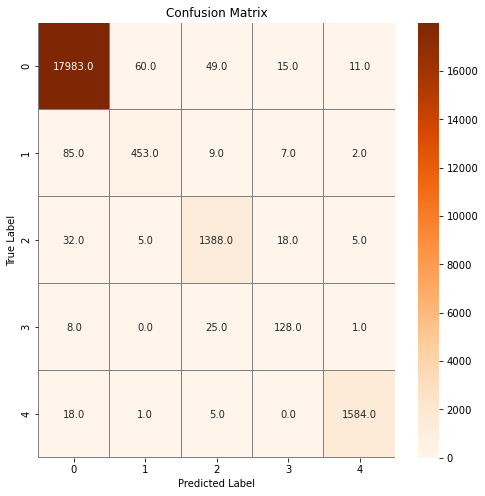

In [174]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Oranges",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [175]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.87      0.81      0.84       556
           2       0.94      0.96      0.95      1448
           3       0.76      0.79      0.78       162
           4       0.99      0.99      0.99      1608

    accuracy                           0.98     21892
   macro avg       0.91      0.91      0.91     21892
weighted avg       0.98      0.98      0.98     21892

